<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_1_An%C3%A1lisis_Descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 1: Análisis descriptivo**
<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

Bienvenidos a nuestra clase, en esta primera sesión aprenderemos tópicos básicos de Python que nos permitirán realizar análisis descriptivos.

## ¿Qué es Python?

Python es un lenguaje de programación versátil, muy potente pero sin reducir su simplicidad y fácil comprensión. EL creador de python nos deja al respecto su opinión

In [ ]:
import this

#DataFrame
Un DataFrame es una estructura tabular que contiene y ordena una colección de Series, donde cada Serie puede representa una columna de la tabla resultante. Un DataFrame tiene índices tanto en columnas (nombre de la variable) como en filas. Adicionalmente, las operaciones son en su mayoria son intercambiables entre estas dos dimensiones.

Para crear un DataFrame podemos partir de un diccionario:

In [ ]:
import pandas as pd
data_1 = {'estado' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'año' : [2012, 2013, 2014, 2014, 2015],
          'poblacion' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,estado,año,poblacion
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


## Librerías en Python

En Python, las librerías son fuentes de recursos con varias funcionalidades. Al utilizar dichas librerías, serás capaz de producir código eficiente y ahorraras invaluable tiempo al no tener que escribir un script desde cero. 

Gran parte de estas librerías son desarrolladas como proyectos Open Source. En esta dinámica, diferentes organizaciones (fundaciones, empresas privadas, universidades o personas individuales) construyen modulos adicionales para solucionar problemas particulares, por ejemplo: análisis numérico, manejo de datos, creación de modelos, visualizaciones. 

In [ ]:
#Instalación de librerías
!pip install pandas

In [ ]:
#Importación de librerías
import pandas as pd

#**PROYECTO 1 - ANÁLISIS DESCRIPTIVO**


#Descripción de la data
Empresa de ventas online

Clientes de diferentes países

Periodo de transacciones - 1 Dic 2010 - 9 Dic 2011 (Un año)

In [ ]:
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_Analisis_Descriptivo.csv'
df = pd.read_csv(url,encoding='latin1')

Importamos las librerías

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno 
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()


En algunos casos no hemos visto nuestro data set por lo que es adecuado tener una vista de él ya sea de las primeras observaciones, las ultimas o algunas aleatoriamente:

In [ ]:
df.head()

,N_Transaccion,Codigo_Producto,Descripcion,Cantidad,Fecha_Hora,Precio_Unitario,ID_Cliente,Pais
0,536365,85123A,SOPORTE DE LUZ EN T CORAZON COLGANTE BLANCO,6,01/12/2010 08:26,2.55,17850.0,USA
1,536365,71053,LINTERNA DE METAL BLANCO,6,01/12/2010 08:26,3.39,17850.0,USA
2,536365,84406B,CREMA CUPID HEARTS PERCHERO,8,01/12/2010 08:26,2.75,17850.0,USA
3,536365,84029G,BOTELLA DE AGUA CALIENTE DE BANDERA DE UNION,6,01/12/2010 08:26,3.39,17850.0,USA
4,536365,84029E,CORAZON BLANCO CALIENTE DE LANA ROJO.,6,01/12/2010 08:26,3.39,17850.0,USA


In [ ]:
df.tail()

,N_Transaccion,Codigo_Producto,Descripcion,Cantidad,Fecha_Hora,Precio_Unitario,ID_Cliente,Pais
3061,536594,84970L,SOPORTE DE LUZ EN T DE ZINC DE UN SOLO CORAZON,12,01/12/2010 17:22,0.95,15235.0,USA
3062,536594,85123A,SOPORTE DE LUZ EN T CORAZON COLGANTE BLANCO,6,01/12/2010 17:22,2.95,15235.0,USA
3063,536595,21877,TAZA CASERA DULCE,1,01/12/2010 17:24,1.25,13576.0,USA
3064,536595,21137,MARCO NEGRO DE LA CUBIERTA,60,01/12/2010 17:24,3.39,13576.0,USA
3065,536595,22041,"MARCO DE GRABACION 7 ""TAMANO UNICO",24,01/12/2010 17:24,2.55,13576.0,USA


In [ ]:
df.sample(10)

,N_Transaccion,Codigo_Producto,Descripcion,Cantidad,Fecha_Hora,Precio_Unitario,ID_Cliente,Pais
2455,536591,85064,RACK DE CARTA DE CREMA DULCE,2,01/12/2010 16:58,5.45,14606.0,USA
2993,536592,85099F,BOLSA DE FRESA JUMBO,1,01/12/2010 17:06,4.21,NaN,USA
2204,536569,22945,ETIQUETAS DE METAL DE NAVIDAD SURTIDAS,12,01/12/2010 15:35,0.85,16274.0,USA
399,536404,85049G,CINTA DE CAJA DE CHOCOLATE,12,01/12/2010 11:29,1.25,16218.0,USA
2544,536592,21314,BOTE CORAZON PEQUENO VIDRIO,8,01/12/2010 17:06,4.21,NaN,USA
449,536408,22178,VICTORIAN VIDRIO COLGANTE LUZ EN T,12,01/12/2010 11:41,1.25,14307.0,USA
1280,536532,84375,SET DE 20 CORTADORES DE GALLETAS PARA NINOS,24,01/12/2010 13:24,2.10,12433.0,Peru
2709,536592,22376,AIRLINE BAG VINTAGE JET SET BLANCO,2,01/12/2010 17:06,8.47,NaN,USA
2465,536592,16238,Borradores de lapiz de fiesta,5,01/12/2010 17:06,0.43,NaN,USA
2142,536562,22752,SET 7 CAJAS DE NIDIFICACION BABUSHKA,2,01/12/2010 15:08,8.50,13468.0,USA


Cambiamos el nombre de las columnas

In [ ]:
df.rename(index=str, columns={'N_Transaccion ': 'n_transaccion',
                              'Codigo_Producto' : 'codigo_producto',
                              'Descripcion' : 'descripcion',
                              'Cantidad' : 'cantidad',
                              'Fecha_Hora' : 'fecha_hora',
                              'Precio_Unitario' : 'precio_unitario',
                              'ID_Cliente' : 'id_cliente',
                              'Pais' : 'pais'}, inplace=True)

#Limpieza y tratamiento de datos
La limpieza de datos, data cleansing o scrubbing es un proceso necesario para asegurar la calidad de los datos que se emplearán para analytics. Este paso es fundamental para minimizar el riesgo que supondría el basar la toma de decisiones en información poco precisa, errónea o incompleta.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3066 entries, 0 to 3065
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N_Transaccion    3066 non-null   object 
 1   codigo_producto  3066 non-null   object 
 2   descripcion      3056 non-null   object 
 3   cantidad         3066 non-null   int64  
 4   fecha_hora       3066 non-null   object 
 5   precio_unitario  3066 non-null   float64
 6   id_cliente       1932 non-null   float64
 7   pais             3066 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 215.6+ KB


In [ ]:
# Revisamos valores perdidos para cada variable
df.isnull().sum().sort_values(ascending=False)

id_cliente         1134
descripcion          10
pais                  0
precio_unitario       0
fecha_hora            0
cantidad              0
codigo_producto       0
N_Transaccion         0
dtype: int64

In [ ]:
# Revisamos como se están mostrando los valores perdidos en nuestra data
df[df.isnull().any(axis=1)].head()

,N_Transaccion,codigo_producto,descripcion,cantidad,fecha_hora,precio_unitario,id_cliente,pais
622,536414,22139,NaN,56,01/12/2010 11:52,0.00,NaN,USA
1443,536544,21773,BOTELLA DECORATIVA DE BANO ROSA,1,01/12/2010 14:32,2.51,NaN,USA
1444,536544,21774,BOTELLA DE BANO GATOS DECORATIVOS,2,01/12/2010 14:32,2.51,NaN,USA
1445,536544,21786,SOMBRERO DE LLUVIA DE POLKADOT,4,01/12/2010 14:32,0.85,NaN,USA
1446,536544,21787,RETROSPOT DE LLUVIA PONCHO,2,01/12/2010 14:32,1.66,NaN,USA


In [ ]:
# Cambiamos el formato de la columna fecha_hora a un formato de fecha en python
df['fecha_hora'] = pd.to_datetime(df.fecha_hora, format='%m/%d/%Y %H:%M')

Removemos filas con valores perdidos


In [ ]:
# Creamos una nueva tabla sin los valores perdidos
df_new = df.dropna()

In [ ]:
# Revisamos nuevamente los valores perdidos en nuestra nueva tabla
df_new.isnull().sum().sort_values(ascending=False)

pais               0
id_cliente         0
precio_unitario    0
fecha_hora         0
cantidad           0
descripcion        0
codigo_producto    0
N_Transaccion      0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1932 entries, 0 to 3065
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   N_Transaccion    1932 non-null   object        
 1   codigo_producto  1932 non-null   object        
 2   descripcion      1932 non-null   object        
 3   cantidad         1932 non-null   int64         
 4   fecha_hora       1932 non-null   datetime64[ns]
 5   precio_unitario  1932 non-null   float64       
 6   id_cliente       1932 non-null   float64       
 7   pais             1932 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 135.8+ KB


In [ ]:
# Cambiamos el tipo de variable del id_cliente
df_new['id_cliente'] = df_new['id_cliente'].astype('str')

In [ ]:
df_new.head()

,N_Transaccion,codigo_producto,descripcion,cantidad,fecha_hora,precio_unitario,id_cliente,pais
0,536365,85123A,SOPORTE DE LUZ EN T CORAZON COLGANTE BLANCO,6,2010-01-12 08:26:00,2.55,17850.0,USA
1,536365,71053,LINTERNA DE METAL BLANCO,6,2010-01-12 08:26:00,3.39,17850.0,USA
2,536365,84406B,CREMA CUPID HEARTS PERCHERO,8,2010-01-12 08:26:00,2.75,17850.0,USA
3,536365,84029G,BOTELLA DE AGUA CALIENTE DE BANDERA DE UNION,6,2010-01-12 08:26:00,3.39,17850.0,USA
4,536365,84029E,CORAZON BLANCO CALIENTE DE LANA ROJO.,6,2010-01-12 08:26:00,3.39,17850.0,USA


In [ ]:
#Veo la cantidad de filas y columnas que tiene mi nueva tabla
df_new.shape

(1932, 8)


Para iniciar hagamos un análisis descriptivo sencillo de los datos:

In [ ]:
df_new.describe().round(2) #El .round(2) es para acotar los resultados a dos decimales

,cantidad,precio_unitario
count,1932.00,1932.00
mean,12.39,3.18
std,32.75,4.92
min,-24.00,0.10
25%,1.00,1.25
50%,4.00,2.10
75%,12.00,3.75
max,600.00,165.00


Vemos que la variable cantidad cuenta con valores negativos lo cual no está bien, así que los removemos de nuestra data

In [ ]:
df_new = df_new[df_new.cantidad > 0]

In [ ]:
df_new.describe()

,cantidad,precio_unitario
count,1906.000000,1906.000000
mean,12.655299,3.172712
std,32.877778,4.916191
min,1.000000,0.100000
25%,1.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,3.750000
max,600.000000,165.000000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 3065
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   N_Transaccion    1906 non-null   object        
 1   codigo_producto  1906 non-null   object        
 2   descripcion      1906 non-null   object        
 3   cantidad         1906 non-null   int64         
 4   fecha_hora       1906 non-null   datetime64[ns]
 5   precio_unitario  1906 non-null   float64       
 6   id_cliente       1906 non-null   object        
 7   pais             1906 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 134.0+ KB


In [ ]:
#Reviso nuevamente el descriptivo y verifico que ya no tenga negativos
df_new.describe().round(2)

,cantidad,precio_unitario
count,1906.00,1906.00
mean,12.66,3.17
std,32.88,4.92
min,1.00,0.10
25%,1.00,1.25
50%,4.00,2.10
75%,12.00,3.75
max,600.00,165.00


Muchas veces podemos crear nuevas variables a partir de las que ya tenemos:

In [ ]:
df_new['venta_total'] = df_new['cantidad'] * df_new['precio_unitario']
df_new.head()

,N_Transaccion,codigo_producto,descripcion,cantidad,fecha_hora,precio_unitario,id_cliente,pais,venta_total
0,536365,85123A,SOPORTE DE LUZ EN T CORAZON COLGANTE BLANCO,6,2010-01-12 08:26:00,2.55,17850.0,USA,15.30
1,536365,71053,LINTERNA DE METAL BLANCO,6,2010-01-12 08:26:00,3.39,17850.0,USA,20.34
2,536365,84406B,CREMA CUPID HEARTS PERCHERO,8,2010-01-12 08:26:00,2.75,17850.0,USA,22.00
3,536365,84029G,BOTELLA DE AGUA CALIENTE DE BANDERA DE UNION,6,2010-01-12 08:26:00,3.39,17850.0,USA,20.34
4,536365,84029E,CORAZON BLANCO CALIENTE DE LANA ROJO.,6,2010-01-12 08:26:00,3.39,17850.0,USA,20.34


Creamos nuevas columnas de fechas

In [ ]:
df_new.insert(loc=2, column='ano_mes', value=df_new['fecha_hora'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='mes', value=df_new.fecha_hora.dt.month)
# +1 para hacer Lunes=1.....hasta Domingo=7
df_new.insert(loc=4, column='dia', value=(df_new.fecha_hora.dt.dayofweek)+1)
df_new.insert(loc=5, column='hora', value=df_new.fecha_hora.dt.hour)
df_new.head()

,N_Transaccion,codigo_producto,ano_mes,mes,dia,hora,descripcion,cantidad,fecha_hora,precio_unitario,id_cliente,pais,venta_total
0,536365,85123A,201001,1,2,8,SOPORTE DE LUZ EN T CORAZON COLGANTE BLANCO,6,2010-01-12 08:26:00,2.55,17850.0,USA,15.30
1,536365,71053,201001,1,2,8,LINTERNA DE METAL BLANCO,6,2010-01-12 08:26:00,3.39,17850.0,USA,20.34
2,536365,84406B,201001,1,2,8,CREMA CUPID HEARTS PERCHERO,8,2010-01-12 08:26:00,2.75,17850.0,USA,22.00
3,536365,84029G,201001,1,2,8,BOTELLA DE AGUA CALIENTE DE BANDERA DE UNION,6,2010-01-12 08:26:00,3.39,17850.0,USA,20.34
4,536365,84029E,201001,1,2,8,CORAZON BLANCO CALIENTE DE LANA ROJO.,6,2010-01-12 08:26:00,3.39,17850.0,USA,20.34


In [ ]:
# Cambiamos el tipo de variable de las que se han creado
df_new['ano_mes'] = df_new['ano_mes'].astype('str')
df_new['mes'] = df_new['mes'].astype('str')
df_new['dia'] = df_new['dia'].astype('str')
df_new['hora'] = df_new['hora'].astype('str')

#**Análisis Exploratorio**
Como parte inicial de todo proyecto de Business Analytics el análisis exploratorio constituye el primer paso en el desarrollo de la solución. Como veremos en las proximas sesiones, a pesar de la gran complejidad de las herramientas de modelación que usaremos, no hay remplazo al entedimiento detallado de la información desde el punto de vista de negocio.

**Variables cuantitativas**

In [ ]:
df_new.describe().round(2) #El .round(2) es para acotar los resultados a dos decimales

,cantidad,precio_unitario,venta_total
count,1906.00,1906.00,1906.00
mean,12.66,3.17,24.23
std,32.88,4.92,66.38
min,1.00,0.10,0.29
25%,1.00,1.25,4.20
50%,4.00,2.10,11.80
75%,12.00,3.75,20.28
max,600.00,165.00,1627.20


En ocasiones cuando queremos mayor detalle de la información podemos ajustar los percentiles a nuestro gusto:

In [ ]:
df_new.describe(percentiles=[.01,.1,.25,.5,.75,.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
cantidad,1906.0,12.655299,32.877778,1.00,1.00,1.00,1.00,4.0,12.00,24.00,144.00,600.0
precio_unitario,1906.0,3.172712,4.916191,0.10,0.29,0.85,1.25,2.1,3.75,6.75,14.95,165.0
venta_total,1906.0,24.234208,66.378259,0.29,0.85,1.69,4.20,11.8,20.28,45.00,220.36,1627.2


¿Qué oportunidades veo?
Hay grupos de clientes con compras muy por encima del promedio (Véase el percentil 99 de las ventas totales) ¿Podríamos hacer promociones personalizadas?

Otra forma de calcular los indicadores estadísticos

In [ ]:
#Media
df_new['venta_total'].mean()

24.2342077649528

In [ ]:
#Desviación estándar
df_new['venta_total'].std()

66.37825910818174

***Histogramas***

Otro punto importante al empezar la exploración de un nuevo conjunto de datos es conociendo la distribución de de los datos. Por ejemplo, si queremos queremos conocer los histogramas de todas las variables cuantitativas de nuestra data lo hacemos de la siguiente manera:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff241720cc0>,
      dtype=object)

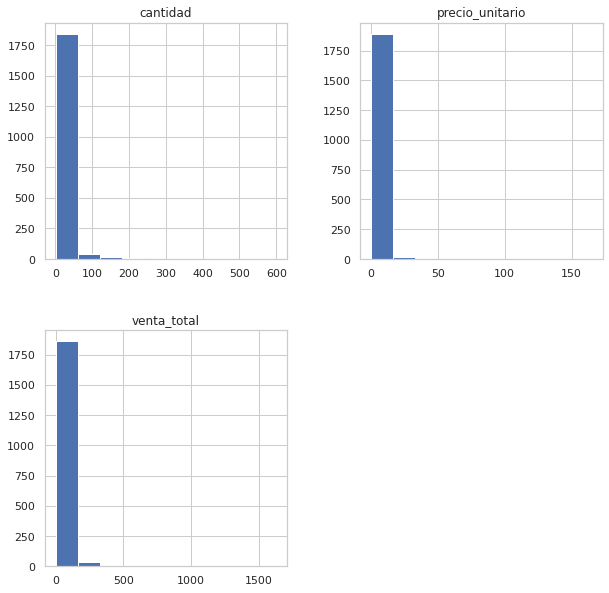

In [ ]:
df_new.hist(figsize=(10,10))

Si bien la distribución me indica que hay alta concentración de datos en los rangos inferiores de las variables, veamos la oportunidad, hay un porcentaje pequeño de clientes que tienen compras muy por encima del promedio, eso a futuro me daría la oportunidad de segmentarlos y poder armarles paquetes promocionales con el objetivo de fidelizarlos.

En esta oportunidad con miras a lograr una mejor lectura de los datos omitiremos los valores por encima del percentil 99 de la venta total.

In [ ]:
df_new = df_new[df_new.venta_total < 220.36]

Si quiero ver el histograma de una sóla variable:

(array([1466.,  243.,   68.,   37.,   31.,   10.,    3.,   10.,   11.,
           7.]),
 array([  0.29 ,  21.461,  42.632,  63.803,  84.974, 106.145, 127.316,
        148.487, 169.658, 190.829, 212.   ]),
 <a list of 10 Patch objects>)

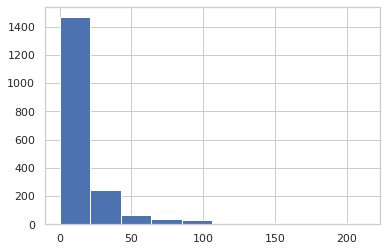

In [ ]:
plt.hist(df_new["venta_total"])

Aquí observamos la salida por defecto para nuestra visualización. Notamos algunas aspectos de mejora como: el tamaño de la gráfica, el número de bins, o la impresión de los arreglos de datos al tope de la figura. Para corregir esto y personalizar nuestra figura podemos:


1.   Definir una figura de marco para la visualización
2. Ajustar el tamaño de la figura
3. Cambiar el color del histograma
4. Ajustar el número de bins
5. Crear una cuadricula para visualizar mejor los valores de referencia
6. Finalizar con la instruccion show para que se muestre toda visualización y no los arreglos de datos del histograma

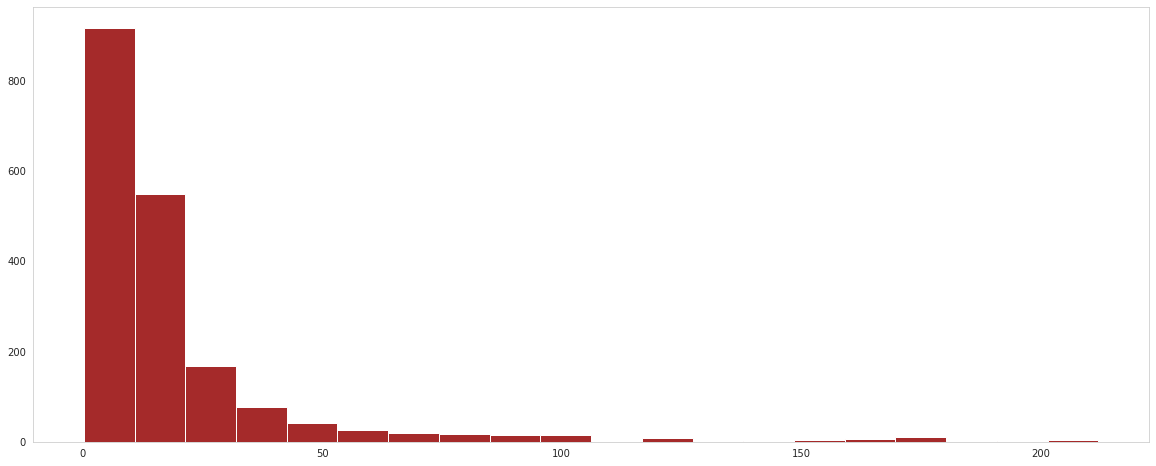

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.hist(df_new["venta_total"],bins=20,color='brown')
plt.grid()
plt.show()

Para seguir con la personalización, ahora podemos incluir legendas a nuestros ejes:

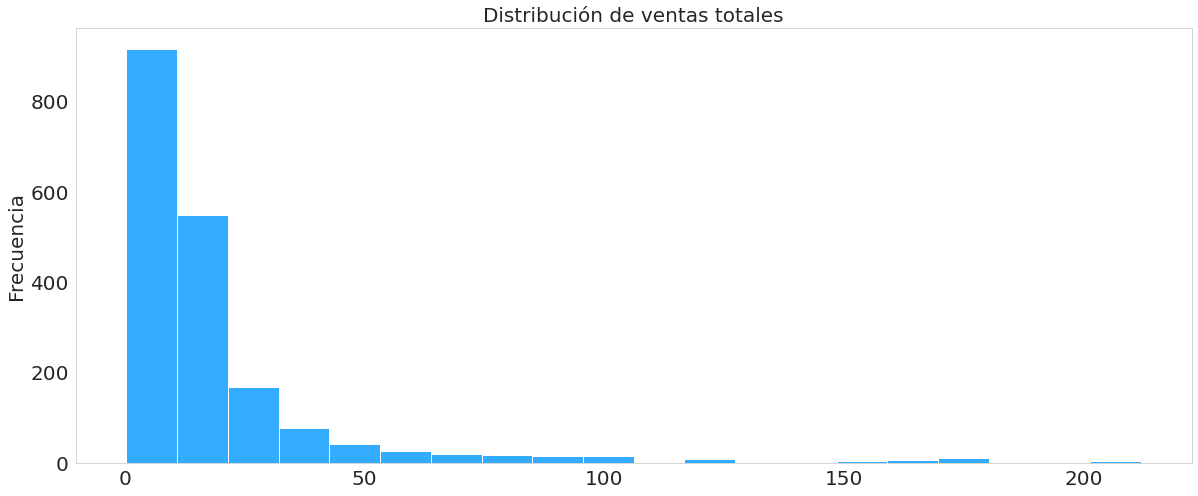

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.hist(df_new["venta_total"],bins=20,color='#33ACFF')

plt.title('Distribución de ventas totales',fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.show()

***Diagrama de cajas***

Recordemos que el diagrama de boxplot nos permite representar gráficamente los cuartiles de una distribución y adicionalmente posibles outliers de en la data.

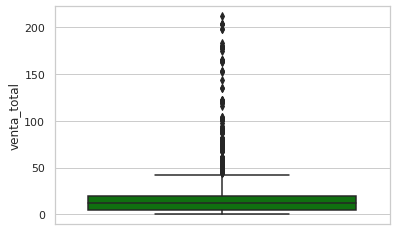

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(y=df_new["venta_total"],color='green')

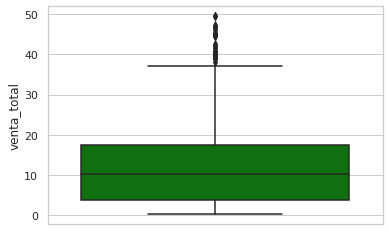

In [ ]:
df_new2 = df_new[df_new.venta_total < 50]#creo una variable temporal sólo para ayudar a la visualización
sns.set(style="whitegrid")
sns.boxplot(y=df_new2["venta_total"],color='green')

***Diagrama de violines***



A continuación veremos el diagrama de violines, que funciona de forma similar al anterior pero nos da mas información de la distribución y no solo algunos valores de referencia. Veamos los mismo ejemplos, pero en esta nueva funcionalidad:


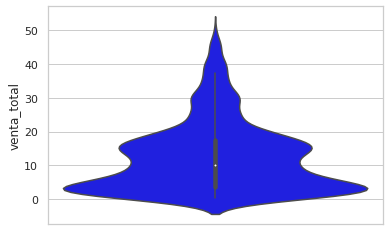

In [ ]:
sns.violinplot(y=df_new2["venta_total"],color='blue')


***Diagrama de enjambre - sawrmplot***


Por último, tenemos el diagrama de enjambre como una forma alternativa de representar la distribución. Aquí nos enfocamos en visualizar cada observación como un punto de información. Nuevamente, veamos los mismo ejemplos, pero en esta nueva funcionalidad:

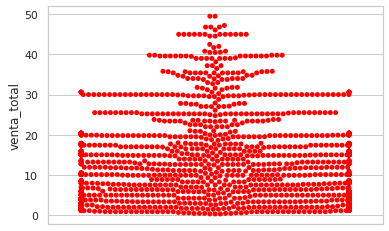

In [ ]:
sns.swarmplot(y=df_new2["venta_total"],color='red')


**Variables cualitativas**

Observo la frecuencia de las variables cualitativas




In [ ]:
df_new['pais'].value_counts

<bound method IndexOpsMixin.value_counts of 0       USA
1       USA
2       USA
3       USA
4       USA
       ... 
3061    USA
3062    USA
3063    USA
3064    USA
3065    USA
Name: pais, Length: 1886, dtype: object>

Si quiero ver la variable como porcentaje

In [ ]:
df_new['pais'].value_counts(normalize=True)

USA          0.923118
Peru         0.038706
Chile        0.011135
Mexico       0.010604
Japon        0.007953
Australia    0.007423
Bolivia      0.001060
Name: pais, dtype: float64

***Diagrama de barras***


Un gráfico de barras es una forma de resumir un conjunto de datos por categorías. La altura de cada barra es proporcional a una agregación específica (por ejemplo, la suma de los valores de la categoría que representa).

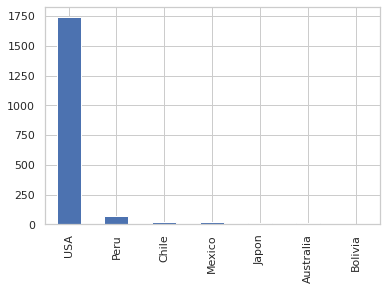

In [ ]:
df_new['pais'].value_counts().plot(kind='bar')

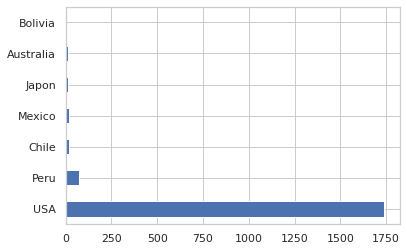

In [ ]:
df_new['pais'].value_counts().plot(kind='barh')

***Diagrama de torta***


En el diagrama de torta se divide un círculo en tantas porciones como clases o grupos de datos existan, de modo que a cada clase le corresponde un arco de círculo proporcional a su número de apariciones o frecuencia.

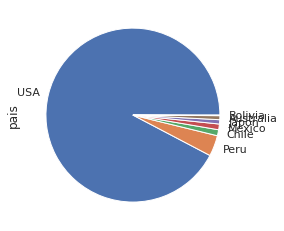

In [ ]:
df_new['pais'].value_counts().plot.pie()

Dada la dispersión que tienen mis datos por país, ¿Me conviene usar un gráfico de torta?

#**Respondiendo hipótesis del negocio**

**Análisis bivariados y multivariados**

¿Qué preguntas quiero responder con esta data? ¿Qué insights puedo ir sacando?

**1. ¿Cuántas compras tenemos por cliente?**

Creamos una nueva tabla agrupada por cliente y el número de transacciones que ha realizado

In [ ]:
df_new.groupby(by=['id_cliente','pais'], as_index=False)['N_Transaccion'].count()

,id_cliente,pais,N_Transaccion
0,12431.0,Australia,14
1,12433.0,Peru,73
2,12583.0,Mexico,20
3,12662.0,Japon,15
4,12748.0,USA,1
...,...,...,...
87,17968.0,USA,85
88,18074.0,USA,13
89,18085.0,USA,9
90,18144.0,USA,3


Revisamos el top 10 de clientes con mayor número de compras

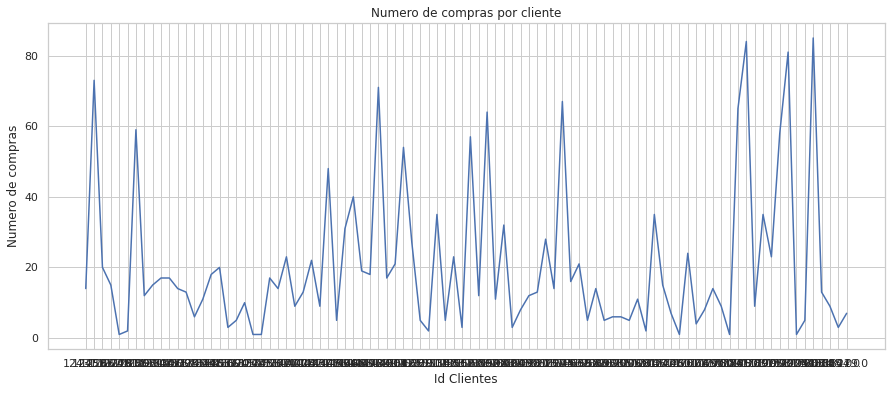

In [ ]:
orders = df_new.groupby(by=['id_cliente','pais'], as_index=False)['N_Transaccion'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.id_cliente, orders.N_Transaccion)
plt.xlabel('Id Clientes')
plt.ylabel('Numero de compras')
plt.title('Numero de compras por cliente')
plt.show()

¿Esta gráfica está bien? ¿Te parece visualmente atractivo para los usuarios? Si no lo es, ¿Te animas a corregirlo?

In [ ]:
print('Top 10 de clientes con mayor número de compras...')
orders.sort_values(by='N_Transaccion', ascending=False).head(10)

Top 10 de clientes con mayor número de compras...


,id_cliente,pais,N_Transaccion
87,17968.0,USA,85
79,17850.0,USA,84
84,17920.0,USA,81
1,12433.0,Peru,73
35,14729.0,USA,71
57,16274.0,USA,67
78,17841.0,USA,65
48,15862.0,USA,64
6,12838.0,USA,59
83,17908.0,USA,58


Más allá de la gráfica, el número de transacciones puede ser una variable relevante para pensar en un análisis de segmentación a futuro, ya que observamos diferentes tipos de consumidores según número de transacciones / compras.

**¿Cuánto dinero gastan los clientes?**

In [ ]:
money_spent = df_new.groupby(by=['id_cliente','pais'], as_index=False)['venta_total'].sum()
print('Top 10 de clientes con mayor consumo en dólares')
money_spent.sort_values(by='venta_total', ascending=False).head(10)

Top 10 de clientes con mayor consumo en dólares


,id_cliente,pais,venta_total
24,13777.0,USA,2561.20
1,12433.0,Peru,1919.14
72,17511.0,USA,1825.74
79,17850.0,USA,1499.34
14,13408.0,USA,1024.68
44,15485.0,USA,950.09
2,12583.0,Mexico,855.86
54,16210.0,USA,847.54
12,13093.0,USA,799.40
58,16456.0,USA,787.40


De los 10 clientes con mayor consumo total en dólares, 8 son de USA, ¿Te animas a ver que tipo de productos compran este top de clientes?

**Descubriendo patrones por país**

Vemos la distribucion de cantidad de compras por país



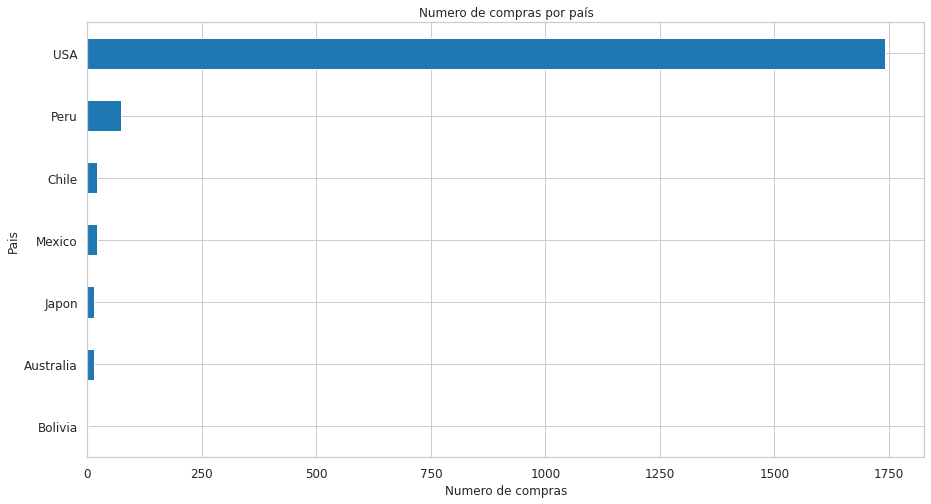

In [ ]:
group_country_orders = df_new.groupby('pais')['N_Transaccion'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Numero de compras', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.title('Numero de compras por país', fontsize=12)
plt.show()

Ahora veamos la distribucion por cantidad de ventas totales


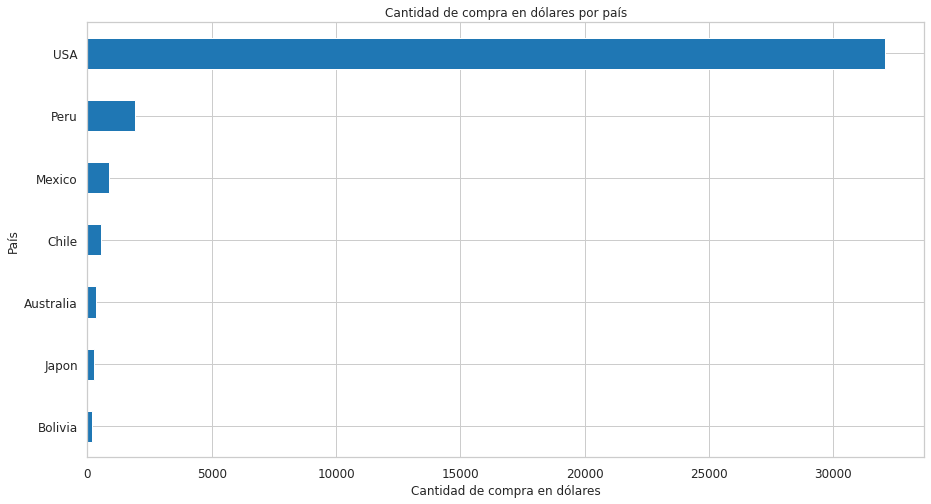

In [ ]:
group_country_amount_spent = df_new.groupby('pais')['venta_total'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Cantidad de compra en dólares', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title('Cantidad de compra en dólares por país', fontsize=12)
plt.show()

Observando ambas distribuciones, aparentemente el gasto total tiene una relación con el número de compras. ¿Lo verificamos?

In [ ]:
correlacion = df_new.corr()
correlacion.head()

,cantidad,precio_unitario,venta_total
cantidad,1.000000,-0.128090,0.623181
precio_unitario,-0.128090,1.000000,0.170909
venta_total,0.623181,0.170909,1.000000


***Mapa de calor - heatmap***

Los mapas de calor tienen gran número de aplicaciones en contexto de sistemas físicos, campo donde surgieron. Sin embargo en la actualidad y para nuestro proposito han encontrado una funcionalidad particular, analisis y representacion de correlaciones.


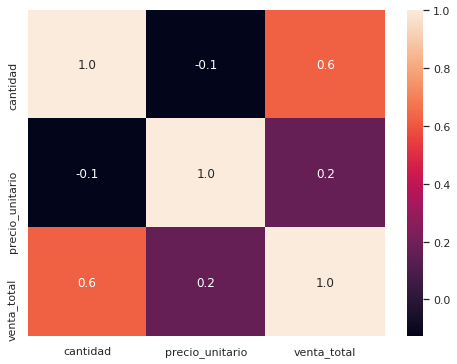

In [ ]:
fig = plt.figure(figsize=(8,6)) 
sns.heatmap(correlacion,annot=correlacion,fmt='.1f')

Si queremos verlo con otros tipos de diseños

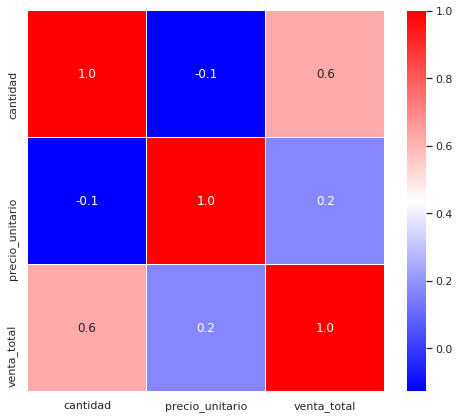

In [ ]:
fig = plt.figure(figsize=(8,7)) 
sns.heatmap(correlacion,annot=correlacion,fmt='.1f',linewidth=0.2,cmap='bwr')

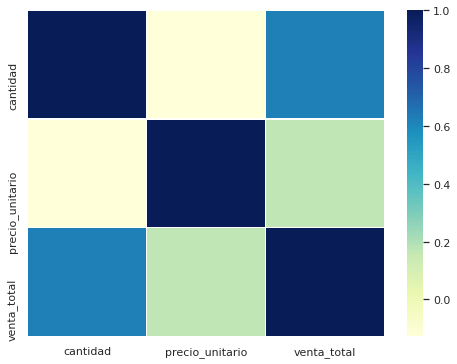

In [ ]:
fig = plt.figure(figsize=(8,6)) 
sns.heatmap(correlacion,linewidth=0.2,cmap='YlGnBu')

**Descubriendo patrones por fecha**

In [ ]:
df_new['hora'].value_counts()

12    418
11    368
13    268
15    187
14    181
16    149
9     143
10    113
8      46
17     13
Name: hora, dtype: int64

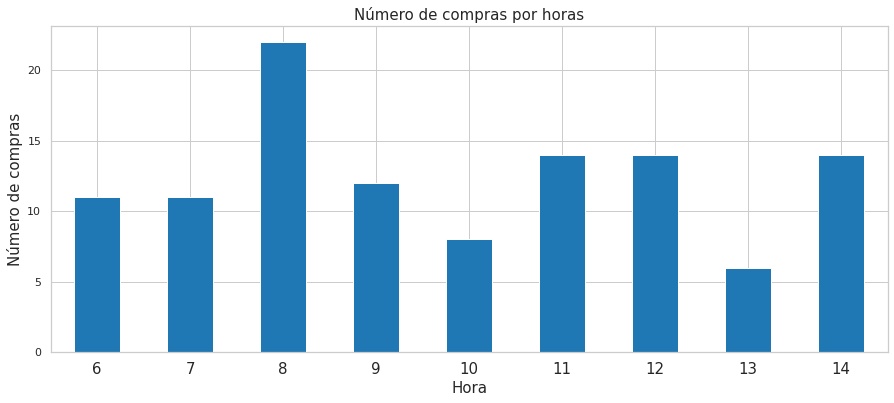

In [ ]:
ax = df_new.groupby('N_Transaccion')['hora'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hora',fontsize=15)
ax.set_ylabel('Número de compras',fontsize=15)
ax.set_title('Número de compras por horas',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

¿Qué insights puedo sacar de acá? Quizás hacer ofertas en las horas que entra más gente a comprar como a las 8 am.

##**Hallazgos encontrados**

1. El cliente con el mayor número de pedidos y dinero gastado en compras proviene de USA, en monto es seguido por un peruano.
2. El horario con mayor número de compras es el de las 8 am.
3. Existe una relación directa entre la cantidad de compras y el monto gastado por lo cual deberíamos incentivar que se compren productos inclusive de bajo precio.
4. Existen 19 clientes que en cada compra que realizan gastan por lo menos 220 dolares (Percentil 99), los cuales podrían formar parte de un segmento Platino.
5. Hay un 9% de clientes que gasta entre 45 a 219 dólares por transacción, ellos son clientes con un potencial interesante, a los cuales podríamos implementar un algoritmo de recomendación para que se acerquen a los clientes del segmento Platino ¿Qué les puede estar faltando para tener un monto más cercano al segmento Platino?

